### Data Transformation
 - Mathematical function applied to the data
   
basic idea: The transform changes the data

### 
Scaling VS Normalizing
#### Scaling
    - Change the range of the data without changing the shape of the distribution(histogram)
    - basicaly linear transformation
#### Normalizing
    - Change the shape of the distribution(and, likely, also the range)
    eg:log transform
    

## 1. Z - Score normalization

#### Why we need it?
    If a person wants to compare his height with someone else's weight. 

    Problem: he unit of height and weight is completely different

    Solution: Normalize both measurements to a unit-less scale

    Key insights:A value on it's own is difficult to interpret; a value relative to it's distribution is easy to interpret

##### Z value of i th element in the dataset is equal to i th element minus mean of the dataset whole divided by standard deviation of the dataset 
The units are standard deviations away from the mean of the distribution(basically unitless)

    If the values Z = -1 than the value is one standard deviation below the mean

#### Z-transform shifts and streches, but doesn't change shape of the distribution

### What is the Key Assumption that makes the z-transform valid
    - Mean and standard deviation are valid description of the distribution's central tendency and dispersion.
that is, the distribution is roughly Gaussian

## 2. Min/Max Scaling

Transforming data from random range to fixed range
eg unity-normed data scale:
    Transforming the data which has let's say -180 to 1000 to 0 to 1


Formula for the scaling 0 to 1: scaled value of datapoint is equal to datapoint minus min of dataset whole divided by max of dataset minus min of dataset

formula for scaling a to b = a + unity-normed value of datapoint(b-a)

## 3. Rounding/Binning

Discretize continuous data into categories by rounding to the nearest bin(eg., 0, 10, 20,.. and categorizing the height data into tall and short)
-> sometimes you lose the sensitivity: group definition may not reflect data charateristics

## 4. Unit Normaliztion

## 5. Rank Tranform 

Transform the data according to their relative position to number line

    -> no invertable
    -> lossy transformation(you can't find the information on the trnsformed data)
    -> non linear
what would you do in case of tie?

## 6. Non-linear transformation

Transform data to make linear method valid, or make data distribution approach gaussian
some mostly used non-linear transformation

    1. Rank Transform
    2. Logarithm
    3. square root
    4. Fisher-z (uniform distribution -> guassian)


Non-linear are always not appropriate
(eg: negative numbers for log and square root)

so which non linear is for which?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Z-score scaling

In [6]:
url = "https://sincxpress.com/sampledata.csv"
df = pd.read_csv(url)
df.describe()

,var1,var2,var3
count,20.000000,20.000000,21.000000
mean,-1.100000,25.450000,4.095238
std,10.356285,29.770128,10.676632
min,-20.000000,-14.000000,-15.000000
25%,-7.750000,10.750000,-5.000000
50%,0.500000,24.000000,3.000000
75%,5.250000,29.500000,12.000000
max,15.000000,129.000000,27.000000


In [7]:
df

,var1,var2,var3
0,-5.0,15.0,-5
1,-13.0,11.0,-8
2,0.0,1.0,12
3,9.0,22.0,15
4,4.0,0.0,6
5,-7.0,24.0,0
6,-16.0,46.0,-15
7,15.0,29.0,14
8,15.0,29.0,14
9,NaN,-14.0,27


<Axes: >

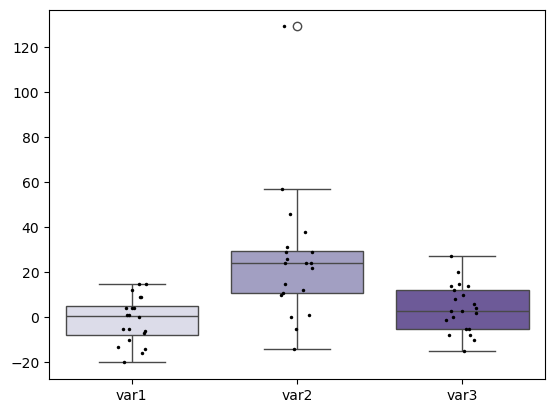

In [4]:
sns.boxplot(data=df, palette='Purples')
sns.stripplot(data=df, marker='.', color='k')

In [9]:
df_z = (df - df.mean()) / df.std(ddof=1)
#what us ddof
df_z

,var1,var2,var3
0,-0.376583,-0.351023,-0.851883
1,-1.149061,-0.485386,-1.132870
2,0.106216,-0.821293,0.740380
3,0.975253,-0.115888,1.021367
4,0.492455,-0.854884,0.178405
5,-0.569702,-0.048707,-0.383570
6,-1.438740,0.690289,-1.788508
7,1.554612,0.119247,0.927705
8,1.554612,0.119247,0.927705
9,NaN,-1.325154,2.145317


,var1,var2,var3
count,2.000000e+01,2.000000e+01,2.100000e+01
mean,1.942890e-17,8.326673e-18,1.776026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.824979e+00,-1.325154e+00,-1.788508e+00
25%,-6.421222e-01,-4.937836e-01,-8.518827e-01
50%,1.544956e-01,-4.870654e-02,-1.025827e-01
75%,6.131543e-01,1.360424e-01,7.403797e-01
max,1.554612e+00,3.478319e+00,2.145317e+00


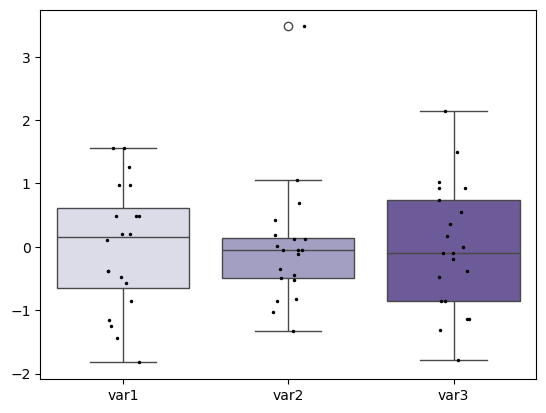

In [10]:
sns.boxplot(data=df_z, palette='Purples')
sns.stripplot(data=df_z, marker='.', color='k')

df_z.describe()

## min/max Scaling

In [11]:
dmax = df.max()
dmin = df.min()

df_mm = (df-dmin)/(dmax-dmin)
df_mm

,var1,var2,var3
0,0.428571,0.202797,0.238095
1,0.200000,0.174825,0.166667
2,0.571429,0.104895,0.642857
3,0.828571,0.251748,0.714286
4,0.685714,0.097902,0.500000
5,0.371429,0.265734,0.357143
6,0.114286,0.419580,0.000000
7,1.000000,0.300699,0.690476
8,1.000000,0.300699,0.690476
9,NaN,0.000000,1.000000


,var1,var2,var3
count,20.000000,20.000000,21.000000
mean,0.540000,0.275874,0.454649
std,0.295894,0.208183,0.254206
min,0.000000,0.000000,0.000000
25%,0.350000,0.173077,0.238095
50%,0.585714,0.265734,0.428571
75%,0.721429,0.304196,0.642857
max,1.000000,1.000000,1.000000


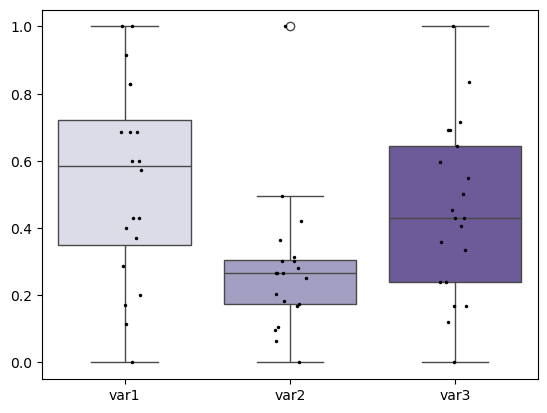

In [12]:
sns.boxplot(data=df_mm, palette='Purples')
sns.stripplot(data=df_mm, marker='.', color='k')

df_mm.describe()

How to do the min-max scaling in scikit learn